Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so I have created one, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting and which you prefer for what cases. Your oppinion is thought after.

Section C. is optional.
     

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## A. Analyzing the data

### 0. read in the data 

In [2]:
# Your solution goes here
chicken = pd.read_csv("chicken.csv")

### 1. Weight by diet summary stats (Pandas groupby and describe)

In [3]:
# Your solution goes here
chicken.groupby(by='diet').describe()

week                                                age         ...  \
      count  mean       std  min  25%   50%   75%   max  count   mean  ...   
diet                                                                   ...   
A     120.0  11.0  6.933053  0.0  5.5  11.0  16.5  22.0  120.0  166.5  ...   
B     120.0  11.0  6.933053  0.0  5.5  11.0  16.5  22.0  120.0  187.9  ...   
C     120.0  11.0  6.933053  0.0  5.5  11.0  16.5  22.0  120.0  183.4  ...   

        weight           eggs                                               
           75%     max  count      mean       std  min  25%  50%  75%  max  
diet                                                                        
A     3952.375  4845.0  120.0  4.483333  0.501817  4.0  4.0  4.0  5.0  5.0  
B     3590.400  4057.6  120.0  4.033333  0.709282  3.0  4.0  4.0  5.0  5.0  
C     3731.375  4508.7  120.0  4.175000  0.706066  3.0  4.0  4.0  5.0  5.0  

[3 rows x 32 columns]

### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [4]:
# Your solution goes here
chicken.groupby(['diet'])['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

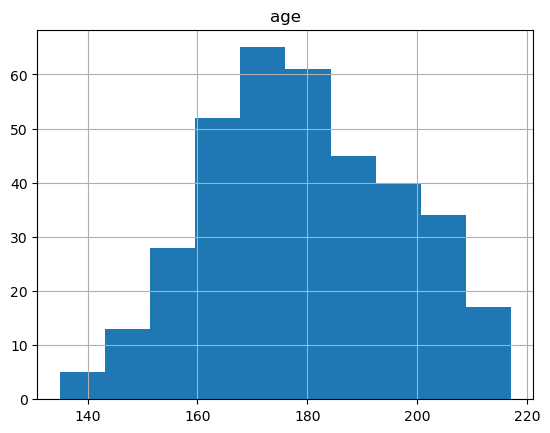

In [5]:
# Your solution goes here
hist = chicken.hist('age')

### 3.2 Histogram of age of chickens (Seaborn distplot())

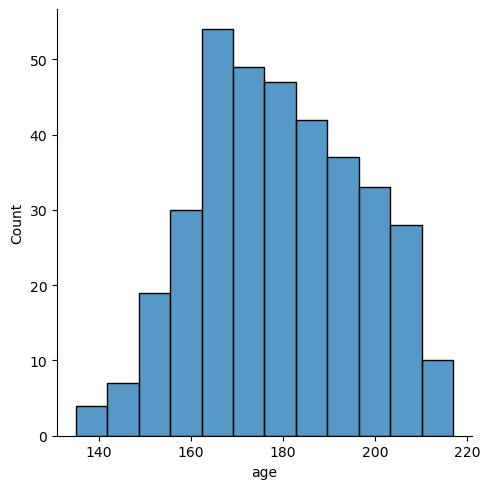

In [6]:
# Your solution goes here
sns.displot(x='age',data=chicken)

### 4.1 Boxplot age (Pandas boxplot())

<AxesSubplot:>

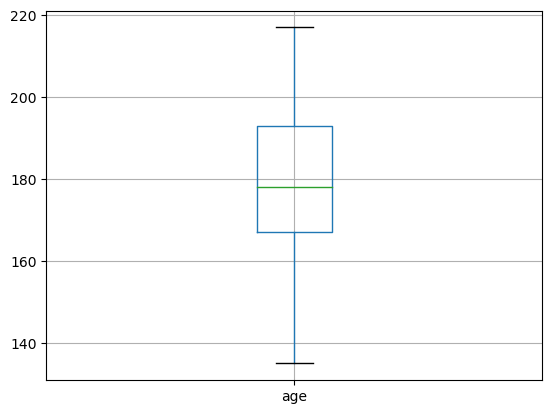

In [7]:
# Your solution goes here
chicken.boxplot(column='age')

### 4.2 Boxplot age (Seaborn boxplot())

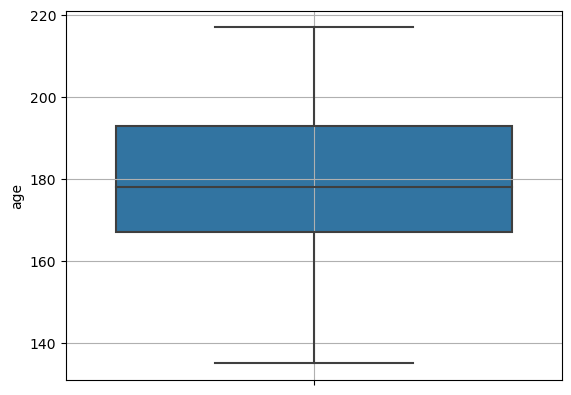

In [8]:
# Your solution goes here
ax = sns.boxplot(y='age',data=chicken)
ax.grid()

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

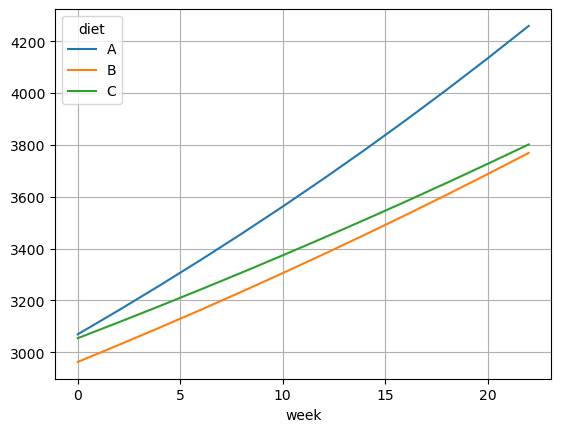

In [9]:
# Your solution goes here
ax = chicken.groupby(by=['week','diet']).weight.mean().unstack().plot()
ax.grid()


### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot:xlabel='week', ylabel='weight'>

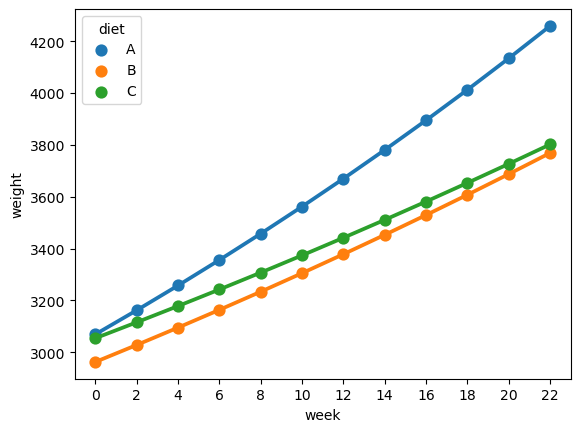

In [10]:
# Your solution goes here
sns.pointplot(x='week',y='weight',hue='diet',data=chicken,ci=None)

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

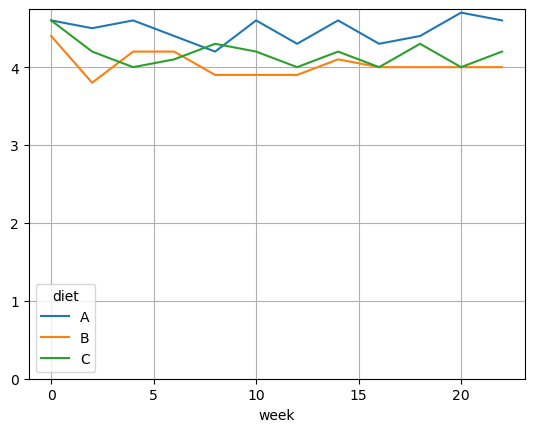

In [11]:
# Your solution goes here
ax = chicken.groupby(by=['week','diet']).eggs.mean().unstack().plot()
ax.set_ylim(ymin=0)
ax.grid()

### 6.2 plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

(0.0, 4.745)

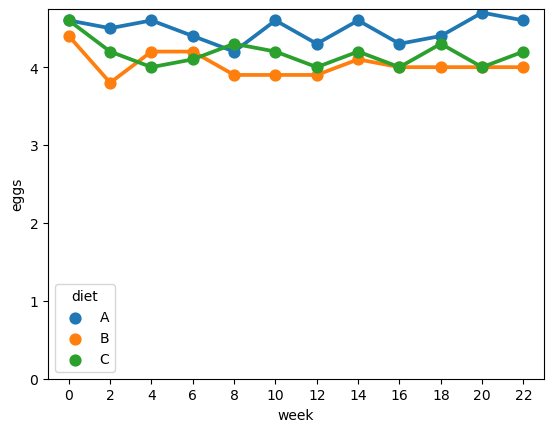

In [12]:
# Your solution goes here
sns.pointplot(x='week',y='eggs',hue='diet',data=chicken,ci=None)
plt.ylim(0)


### 7. Average age by diet stats (Pandas groupby())

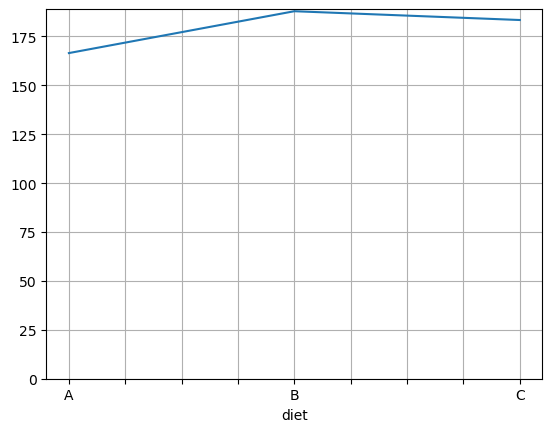

In [18]:
# Your solution goes here
ax = chicken.groupby('diet').age.mean().plot()
ax.set_ylim(ymin=0)
ax.grid()

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


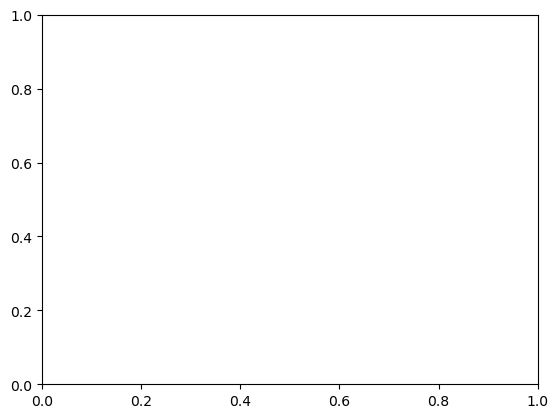

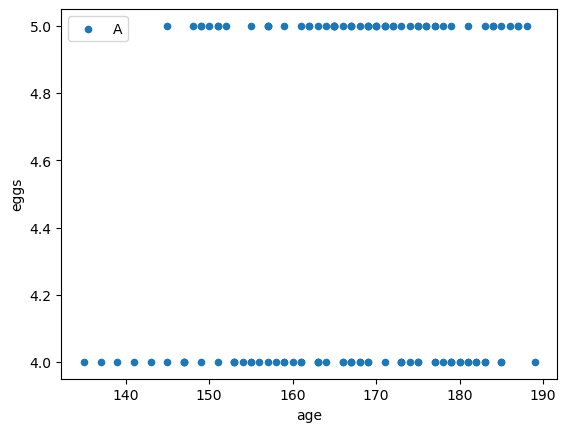

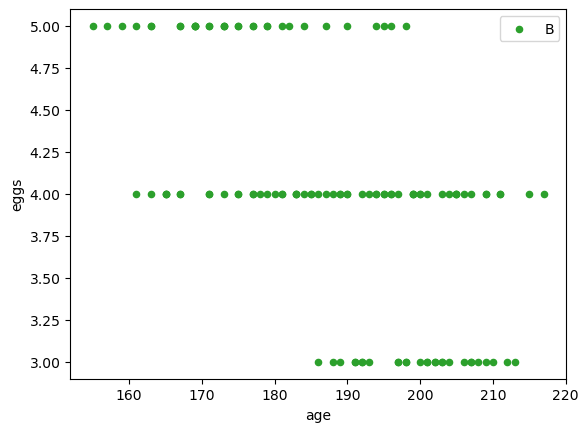

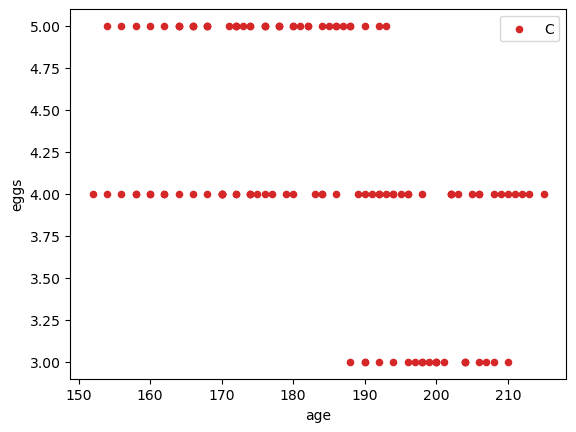

In [37]:
# Your solution goes here
colors = {'A':'tab:blue','B':'tab:green','C':'tab:red'}
# ax = chicken.groupby('diet').plot.scatter(x='age',y='eggs')

fig, ax = plt.subplots()
ax = plt.gca()
for key, group in chicken.groupby(by='diet'):
    group.plot.scatter(x='age',y='eggs',c=colors[key],label=key)


### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


In [ ]:
# Your solution goes here


### 9.1 Boxplot age by diet (Pandas boxplot())

In [ ]:
# Your solution goes here

### 9.2 Boxplot age by diet (Seaborn boxplot())

In [ ]:
# Your solution goes here

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when seaborn?

**Your answers can go here:**








## C. (optional) Create your own chicken data set using pandas and numpy
You need 3 groups (A, B, C), a time in weeks, individuals are chickens with a certain age in weeks, their weight is roughly the same in each of the groups at the start of the experiment and increases, differently for diets, and they lay eggs.

Young chickens generally lay more eggs.
One group will have more young chickens.

In [ ]:
# Your solution goes here
